<a href="https://colab.research.google.com/github/krishna324-art/Practice_Notebooks/blob/main/Datavisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import plotly.graph_objects as go


# 1. Initial toy embeddings (3D for visualization)

embeddings = {
    "dog":   np.array([0.5, 0.2, 0.1]),
    "puppy": np.array([-0.3, 0.1, 0.4]),
    "car":   np.array([0.1, -0.4, -0.3])
}

# 2. Training hyperparameters

learning_rate = 0.1
target = 1.0   # we want "dog" and "puppy" to be similar
history = []   # to save positions at each step

# 3. Training loop

for step in range(10):  # 10 updates just to visualize
    dog, puppy = embeddings["dog"], embeddings["puppy"]

    # similarity (dot product)
    sim = np.dot(dog, puppy)

    # loss (MSE for simplicity)
    loss = (target - sim) ** 2

    # gradient wrt embeddings
    grad_dog = -2 * (target - sim) * puppy
    grad_puppy = -2 * (target - sim) * dog

    # gradient descent update
    embeddings["dog"] -= learning_rate * grad_dog
    embeddings["puppy"] -= learning_rate * grad_puppy

    # save positions
    history.append({
        "step": step,
        "dog": embeddings["dog"].copy(),
        "puppy": embeddings["puppy"].copy(),
        "car": embeddings["car"].copy(),
        "loss": loss
    })


# 4. Plot final positions (interactive 3D with connecting line)

fig = go.Figure()

# Plot embeddings + line connecting dog & puppy
for h in history:
    # Scatter points
    fig.add_trace(go.Scatter3d(
        x=[h["dog"][0], h["puppy"][0], h["car"][0]],
        y=[h["dog"][1], h["puppy"][1], h["car"][1]],
        z=[h["dog"][2], h["puppy"][2], h["car"][2]],
        mode="markers+text",
        text=["dog", "puppy", "car"],
        textposition="top center",
        marker=dict(size=5),
        name=f"Step {h['step']} (loss={h['loss']:.2f})"
    ))

    # Line connecting dog and puppy
    fig.add_trace(go.Scatter3d(
        x=[h["dog"][0], h["puppy"][0]],
        y=[h["dog"][1], h["puppy"][1]],
        z=[h["dog"][2], h["puppy"][2]],
        mode="lines",
        line=dict(color="blue", width=3),
        showlegend=False
    ))

fig.update_layout(
    title="Toy Embedding Training: 'dog' and 'puppy' move closer",
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
    showlegend=True
)

fig.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go


# 1. Initial toy embeddings (3D for visualization)

embeddings = {
    "dog":   np.array([0.5, 0.2, 0.1]),
    "puppy": np.array([-0.3, 0.1, 0.4]),
    "car":   np.array([0.1, -0.4, -0.3])
}

# 2. Training hyperparameters

learning_rate = 0.1
target = 1.0
history = []


# 3. Training loop

for step in range(10):
    dog, puppy = embeddings["dog"], embeddings["puppy"]

    sim = np.dot(dog, puppy)  # dot product
    loss = (target - sim) ** 2

    grad_dog = -2 * (target - sim) * puppy
    grad_puppy = -2 * (target - sim) * dog

    embeddings["dog"] -= learning_rate * grad_dog
    embeddings["puppy"] -= learning_rate * grad_puppy

    history.append({
        "step": step,
        "dog": embeddings["dog"].copy(),
        "puppy": embeddings["puppy"].copy(),
        "car": embeddings["car"].copy(),
        "loss": loss,
        "cosine": np.dot(dog, puppy) / (np.linalg.norm(dog)*np.linalg.norm(puppy))
    })

# 4. Plot arrows (vectors from origin)

fig = go.Figure()

for h in history:
    for word in ["dog", "puppy", "car"]:
        vec = h[word]
        fig.add_trace(go.Cone(
            x=[0], y=[0], z=[0],  # start at origin
            u=[vec[0]], v=[vec[1]], w=[vec[2]],  # direction
            sizemode="absolute",
            sizeref=0.3,
            anchor="tail",
            name=f"{word} (step {h['step']})",
            showscale=False
        ))

fig.update_layout(
    title="Word Vectors as Arrows from Origin<br>('dog' & 'puppy' align over training)",
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z")
)

fig.show()


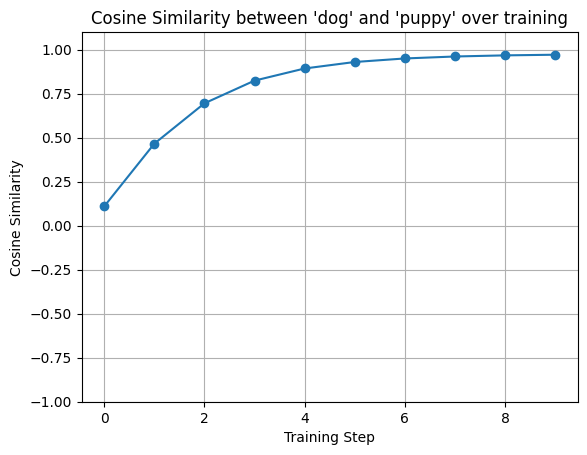

In [3]:
import matplotlib.pyplot as plt

# Extract cosine similarity values
cosines = [h["cosine"] for h in history]
steps = [h["step"] for h in history]

plt.plot(steps, cosines, marker="o")
plt.title("Cosine Similarity between 'dog' and 'puppy' over training")
plt.xlabel("Training Step")
plt.ylabel("Cosine Similarity")
plt.ylim(-1, 1.1)
plt.grid(True)
plt.show()


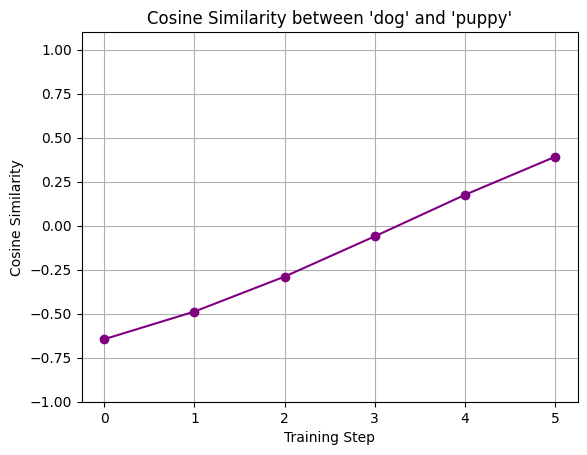

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ---- STEP 1: Initialize toy embeddings ----
dog = np.array([1.0, 0.5, 0.2])
puppy = np.array([-0.8, 0.3, 0.1])
car = np.array([0.2, 1.0, -0.5])  # unrelated word

# simple cosine similarity function
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# ---- STEP 2: Training simulation (dog and puppy get closer) ----
history = []
lr = 0.1  # learning rate

for step in range(6):
    history.append({
        "step": step,
        "dog": dog.copy(),
        "puppy": puppy.copy(),
        "car": car.copy(),
        "cosine": cosine_similarity(dog, puppy)
    })

    # stop after recording initial state
    if step == 5:
        break

    # gradient step: move dog and puppy toward each other
    direction = puppy - dog
    dog = dog + lr * direction
    puppy = puppy - lr * direction


# ---- STEP 3: Cosine similarity line chart ----
cosines = [h["cosine"] for h in history]
steps = [h["step"] for h in history]

plt.plot(steps, cosines, marker="o", color="purple")
plt.title("Cosine Similarity between 'dog' and 'puppy'")
plt.xlabel("Training Step")
plt.ylabel("Cosine Similarity")
plt.ylim(-1, 1.1)
plt.grid(True)
plt.show()


# ---- STEP 4: Animated 3D Plot ----
frames = []
for h in history:
    frames.append(
        go.Frame(
            data=[
                go.Scatter3d(
                    x=[h["dog"][0], h["puppy"][0], h["car"][0]],
                    y=[h["dog"][1], h["puppy"][1], h["car"][1]],
                    z=[h["dog"][2], h["puppy"][2], h["car"][2]],
                    mode="markers+text",
                    text=["dog", "puppy", "car"],
                    textposition="top center",
                    marker=dict(size=6, color=["red", "blue", "green"])
                ),
                go.Scatter3d(
                    x=[h["dog"][0], h["puppy"][0]],
                    y=[h["dog"][1], h["puppy"][1]],
                    z=[h["dog"][2], h["puppy"][2]],
                    mode="lines",
                    line=dict(color="black", width=4)
                )
            ],
            name=f"Step {h['step']}"
        )
    )

fig = go.Figure(frames=frames)

# show the first frame (step 0)
first = history[0]
fig.add_trace(
    go.Scatter3d(
        x=[first["dog"][0], first["puppy"][0], first["car"][0]],
        y=[first["dog"][1], first["puppy"][1], first["car"][1]],
        z=[first["dog"][2], first["puppy"][2], first["car"][2]],
        mode="markers+text",
        text=["dog", "puppy", "car"],
        textposition="top center",
        marker=dict(size=6, color=["red", "blue", "green"])
    )
)
fig.add_trace(
    go.Scatter3d(
        x=[first["dog"][0], first["puppy"][0]],
        y=[first["dog"][1], first["puppy"][1]],
        z=[first["dog"][2], first["puppy"][2]],
        mode="lines",
        line=dict(color="black", width=4)
    )
)

# layout with play button
fig.update_layout(
    title="Dog & Puppy Embeddings Converging",
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(label="Play",
                      method="animate",
                      args=[None, {"frame": {"duration": 700, "redraw": True},
                                   "fromcurrent": True}])]
    )]
)

fig.show()
